In [1]:
import sys
import numpy as np
import pyAgrum as gum
%matplotlib inline
from pyAgrum.lib.bn2roc import showROC

In [2]:
bn=gum.loadBN("../resources/alarm.dsl")

In [15]:
# generateCSV from a BN 
import pyAgrum.lib.bn2csv as bn2csv
bn2csv.generateCSV(bn,"learn.csv",10000,True)
bn2csv.generateCSV(bn,"train.csv",1000,True)

 learn.csv : [ ############################################################### ] 100%
Log2-Likelihood : -151115.73521686558

 train.csv : [ ############################################################### ] 100%
Log2-Likelihood : -14774.969423678745



-14774.969423678745

In [9]:
# Learning a BN from the database
learner=gum.BNLearner("train.csv")

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

In [24]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn2,size="8")

In [10]:
print(bn2.names())

['ANAPHYLAXIS', 'TPR', 'DISCONNECT', 'LVFAILURE', 'HISTORY', 'FIO2', 'ERRCAUTER', 'ERRLOWOUTPUT', 'INSUFFANESTH', 'PULMEMBOLUS', 'PAP', 'MINVOLSET', 'VENTMACH', 'VENTTUBE', 'INTUBATION', 'SHUNT', 'HYPOVOLEMIA', 'STROKEVOLUME', 'LVEDVOLUME', 'PCWP', 'CVP', 'KINKEDTUBE', 'VENTLUNG', 'MINVOL', 'VENTALV', 'ARTCO2', 'EXPCO2', 'PVSAT', 'SAO2', 'CATECHOL', 'HR', 'CO', 'BP', 'HRSAT', 'HREKG', 'HRBP', 'PRESS']


In [20]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT<2,0,1>
INTUBATION<0,1,2>


 train.csv : [ ############################################################### ] 100%
 result in roc_Learned_0.364456s-train.csv-HRSAT-2.png


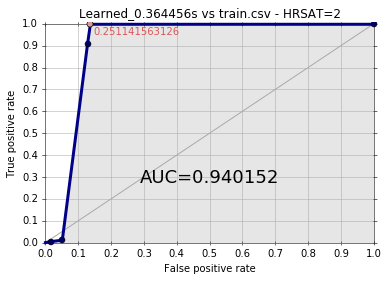

In [19]:
showROC(bn2,"train.csv",'HRSAT',"2",True,True) 

 train.csv : [ ############################################################### ] 100%
 result in roc_Learned_0.364456s-train.csv-INTUBATION-0.png


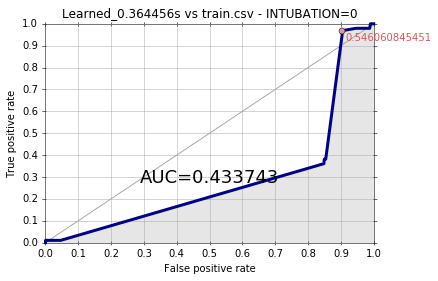

In [26]:
showROC(bn2,"train.csv",'INTUBATION',"0",True,True) 